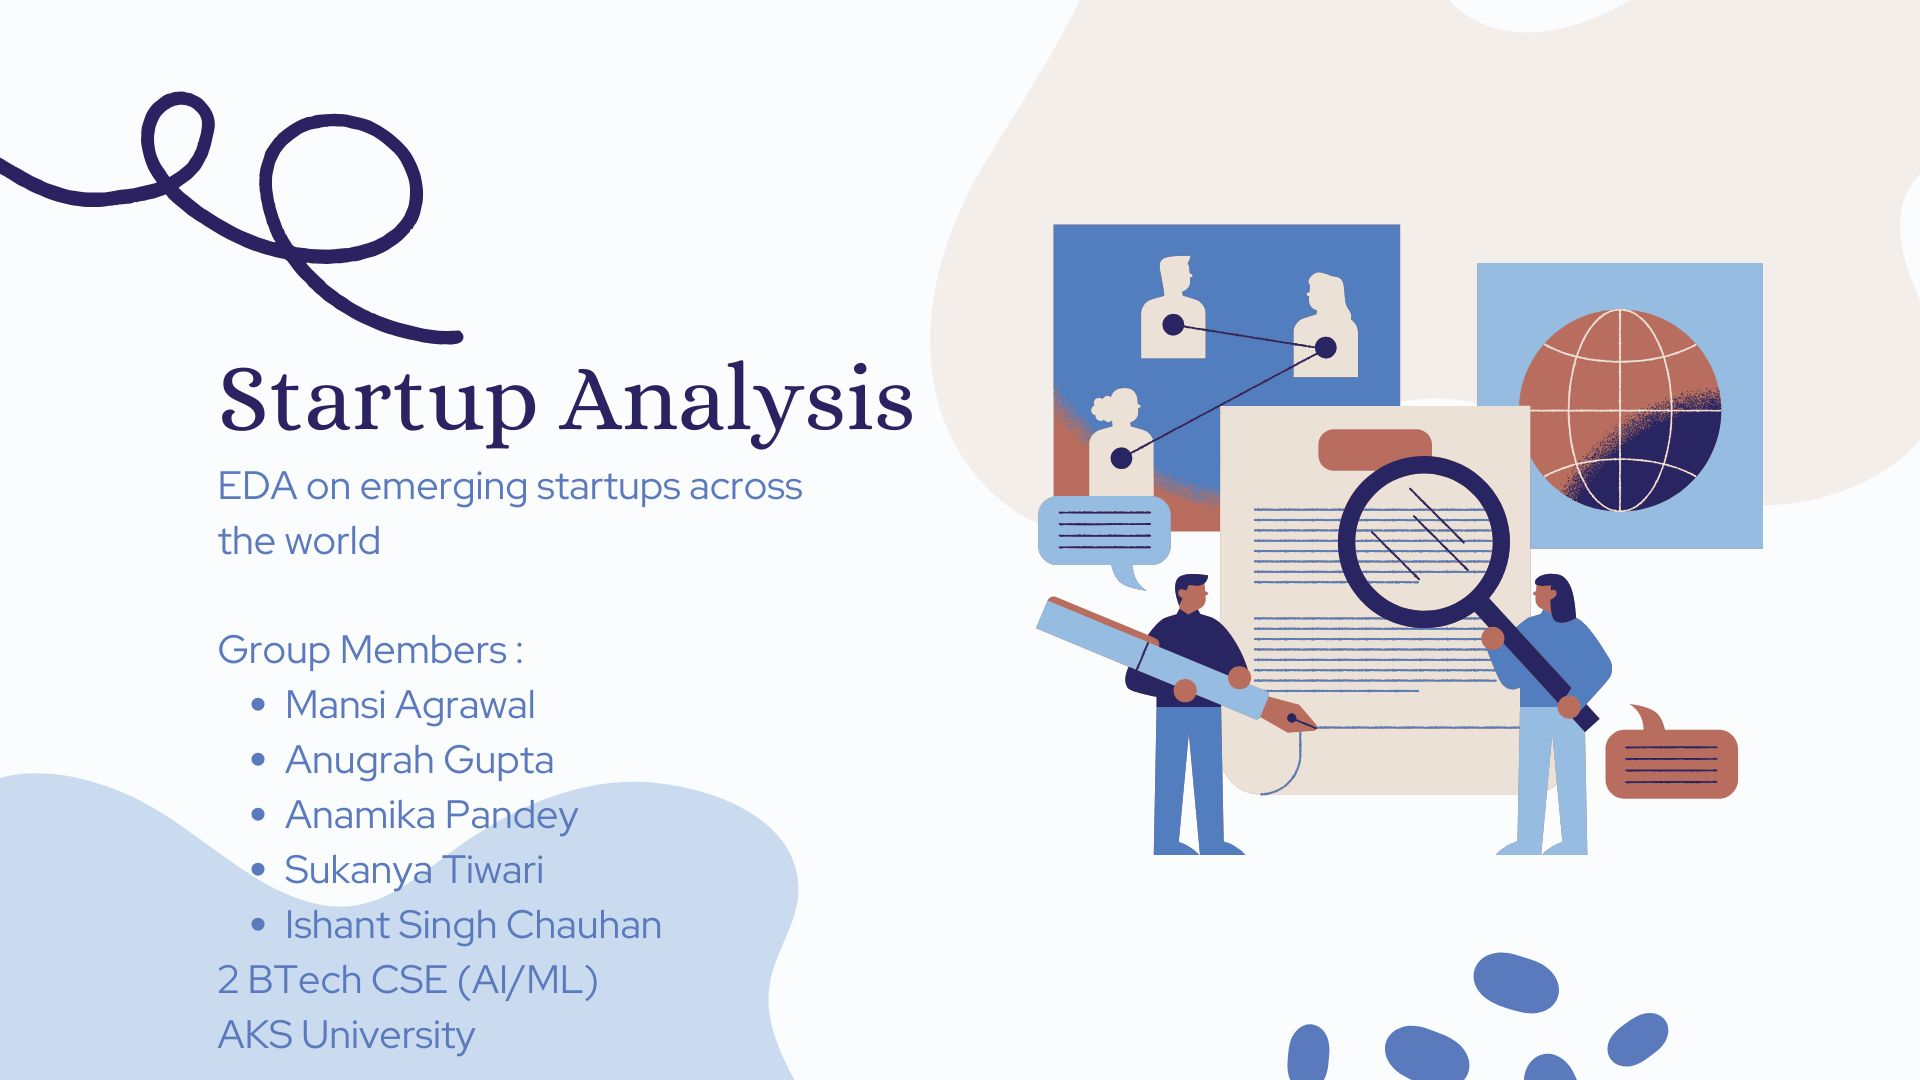

In [1]:
from PIL import Image
from IPython.display import display
img = Image.open('Startup Analysis.jpg')
display(img)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the dataset
df = pd.read_csv('improved_global_startups_dataset.csv')

# Display basic info
print("Shape of dataset:", df.shape)
print("\nColumn Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())


Shape of dataset: (10000, 12)

Column Types:
 Startup Name            object
Country                 object
City                    object
Founded Year             int64
Industry                object
Number of Employees      int64
Funding Stage           object
Total Funding (USD)    float64
Revenue (USD)          float64
Valuation (USD)        float64
Success                  int64
Failure                  int64
dtype: object

First 5 rows:
        Startup Name Country       City  Founded Year Industry  \
0    SmartNetworks0  Brazil  São Paulo          2006     SaaS   
1          NeoLabs1   India  Bangalore          2015   Gaming   
2     SmartSystems2   India  Bangalore          2005     SaaS   
3  TechInnovations3      UK     London          2002     SaaS   
4  GlobalSolutions4     USA   New York          2022  Fintech   

   Number of Employees Funding Stage  Total Funding (USD)  Revenue (USD)  \
0                  479      Series A           4127641.45     1651252.57   
1        

In [3]:
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Unique values in each column
print("\nUnique values per column:\n", df.nunique())



Missing Values:
 Startup Name           0
Country                0
City                   0
Founded Year           0
Industry               0
Number of Employees    0
Funding Stage          0
Total Funding (USD)    0
Revenue (USD)          0
Valuation (USD)        0
Success                0
Failure                0
dtype: int64

Unique values per column:
 Startup Name           10000
Country                   10
City                      11
Founded Year              24
Industry                  10
Number of Employees      742
Funding Stage              7
Total Funding (USD)     9009
Revenue (USD)          10000
Valuation (USD)        10000
Success                    2
Failure                    2
dtype: int64


In [4]:
# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Double-check dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Startup Name         10000 non-null  object 
 1   Country              10000 non-null  object 
 2   City                 10000 non-null  object 
 3   Founded Year         10000 non-null  int64  
 4   Industry             10000 non-null  object 
 5   Number of Employees  10000 non-null  int64  
 6   Funding Stage        10000 non-null  object 
 7   Total Funding (USD)  10000 non-null  float64
 8   Revenue (USD)        10000 non-null  float64
 9   Valuation (USD)      10000 non-null  float64
 10  Success              10000 non-null  int64  
 11  Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 937.6+ KB


In [5]:
# Create a new column: Age of the startup
current_year = 2025
df['Startup Age'] = current_year - df['Founded Year']


## 📊 Exploratory Data Analysis (EDA)
We visualize the startup trends by geography, industry, funding, and success.

In [6]:
# Confirm categorical columns
categorical_cols = ['Country', 'City', 'Industry', 'Funding Stage']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [7]:
df.drop(columns=['Startup Name'], inplace=True)


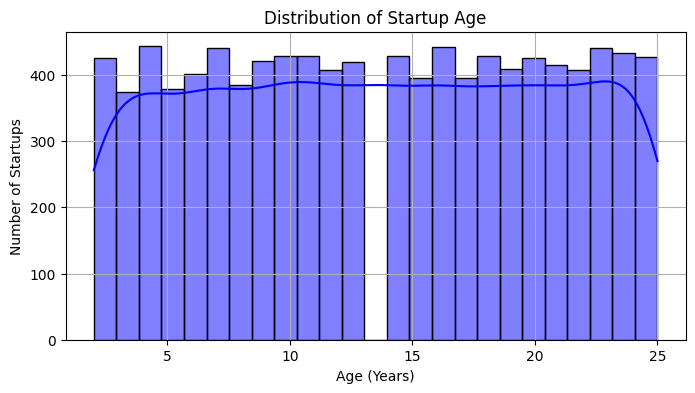

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Startup Age'], bins=25, kde=True, color='blue')
plt.title('Distribution of Startup Age')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Startups')
plt.grid(True)
plt.show()


C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\896389560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index, palette='coolwarm')


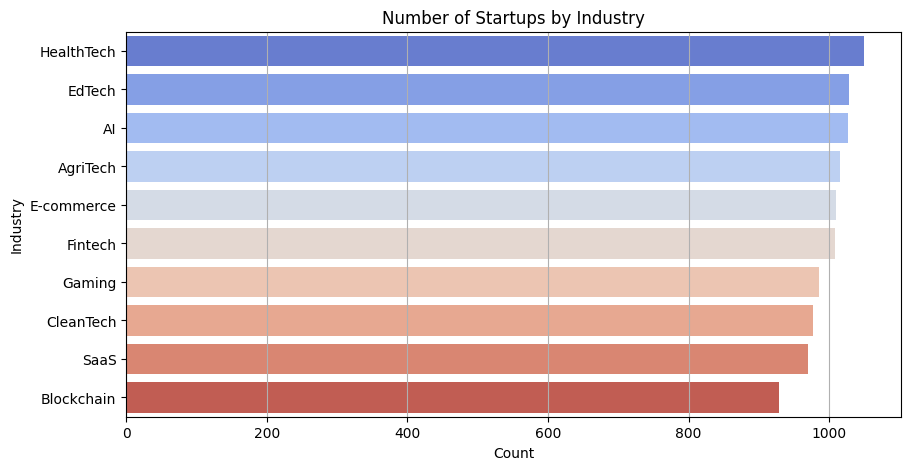

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Industry', order=df['Industry'].value_counts().index, palette='coolwarm')
plt.title('Number of Startups by Industry')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.grid(axis='x')
plt.show()


C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\3476388837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  industry_success = df.groupby('Industry')['Success'].mean().sort_values(ascending=False)
C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\3476388837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_success.values, y=industry_success.index, palette='Greens_r')


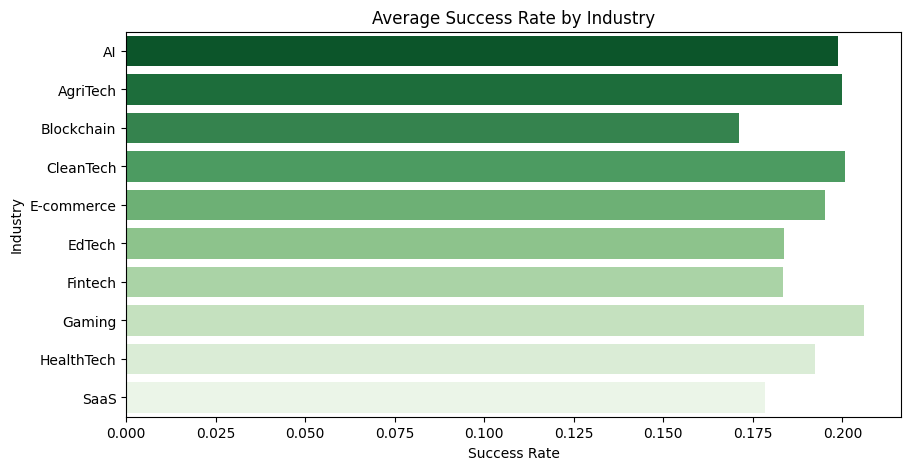

In [10]:
industry_success = df.groupby('Industry')['Success'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=industry_success.values, y=industry_success.index, palette='Greens_r')
plt.title('Average Success Rate by Industry')
plt.xlabel('Success Rate')
plt.ylabel('Industry')
plt.show()


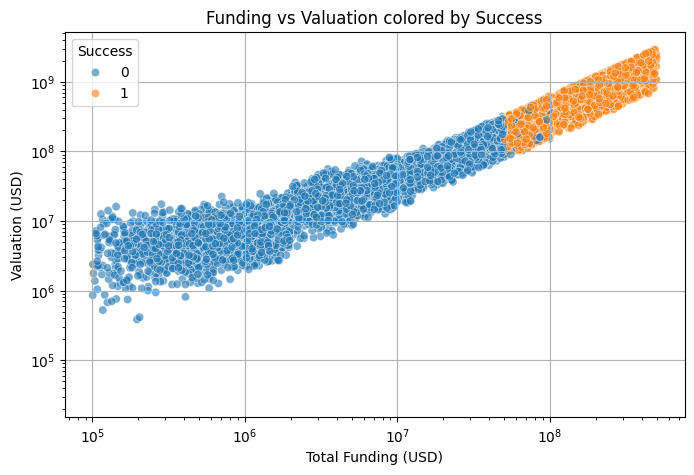

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Total Funding (USD)', y='Valuation (USD)', hue='Success', alpha=0.6)
plt.title('Funding vs Valuation colored by Success')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Valuation (USD)')
plt.legend(title='Success')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()


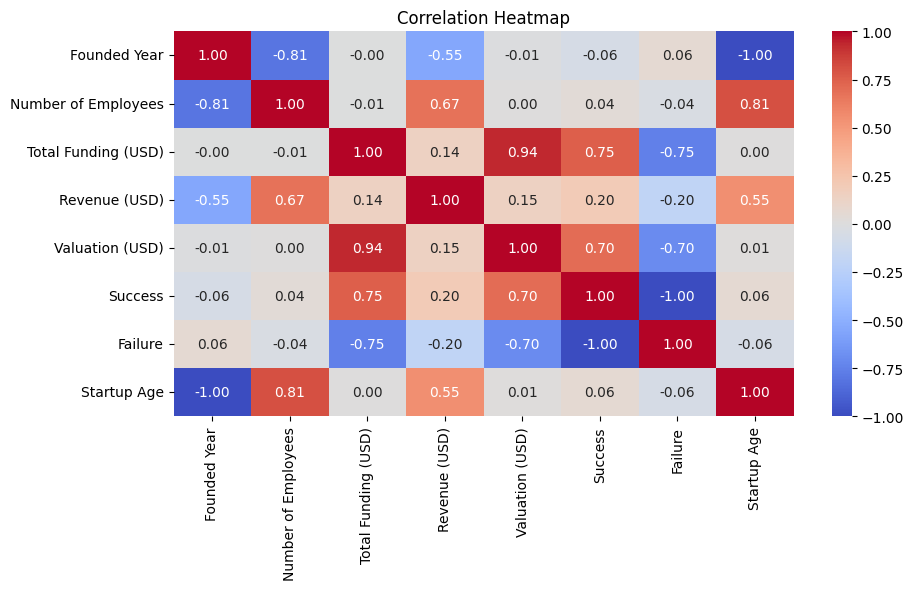

In [12]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\1411170150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index[:10], palette='magma')


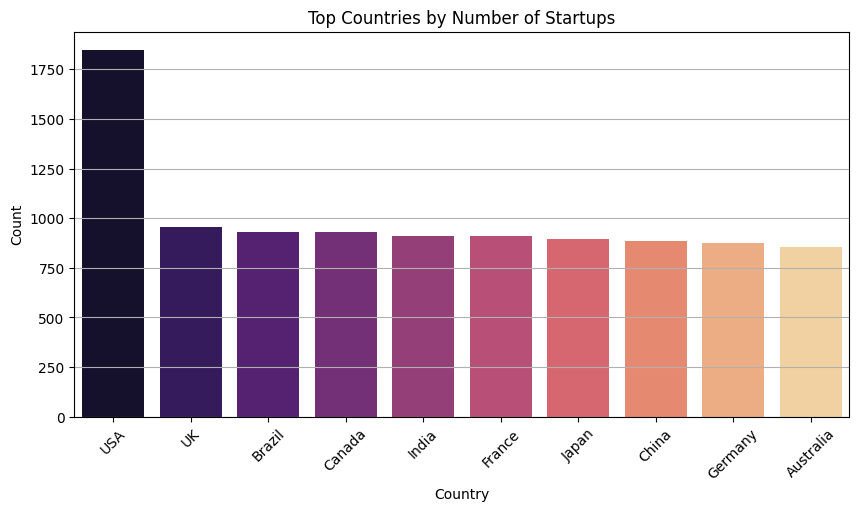

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index[:10], palette='magma')
plt.title('Top Countries by Number of Startups')
plt.xlabel('Country')
plt.ylabel('Count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


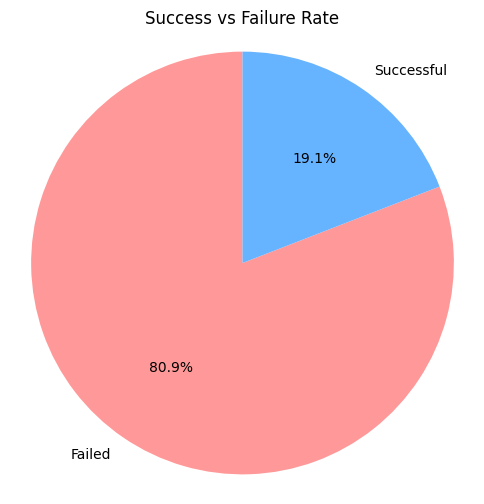

In [14]:
plt.figure(figsize=(6, 6))
labels = ['Failed', 'Successful']
sizes = [df['Failure'].sum(), df['Success'].sum()]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Success vs Failure Rate')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


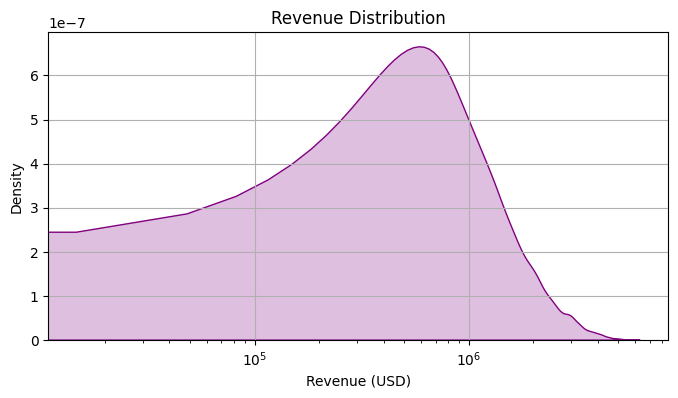

In [15]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df['Revenue (USD)'], fill=True, color='purple')
plt.title('Revenue Distribution')
plt.xlabel('Revenue (USD)')
plt.xscale('log')  # log scale for better spread
plt.grid(True)
plt.show()


C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\3157121632.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stage_success = df.groupby('Funding Stage')['Success'].mean().sort_values(ascending=False)
C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\3157121632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_success.index, y=stage_success.values, palette='Blues_d')


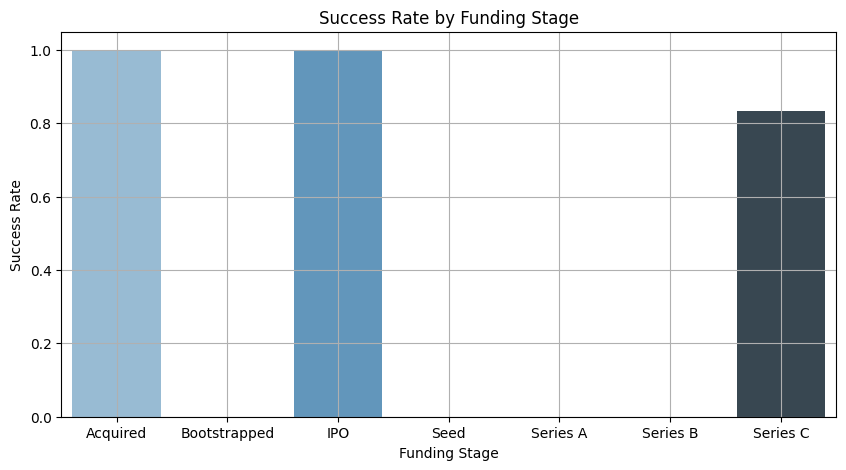

In [16]:
plt.figure(figsize=(10, 5))
stage_success = df.groupby('Funding Stage')['Success'].mean().sort_values(ascending=False)

sns.barplot(x=stage_success.index, y=stage_success.values, palette='Blues_d')
plt.title('Success Rate by Funding Stage')
plt.ylabel('Success Rate')
plt.xlabel('Funding Stage')
plt.grid(True)
plt.show()


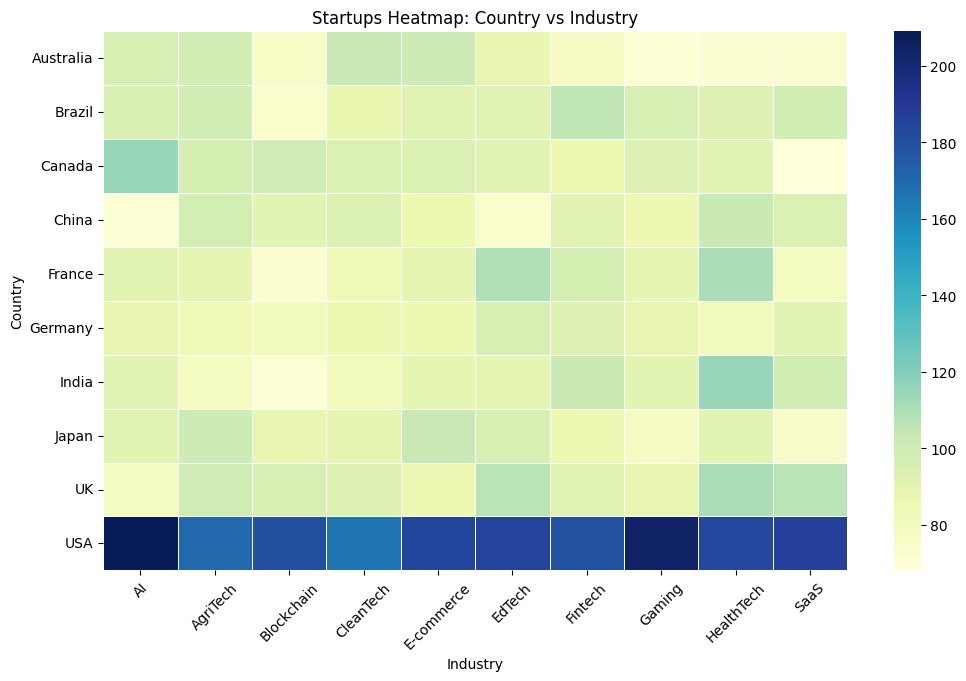

In [17]:
pivot = pd.crosstab(df['Country'], df['Industry'])

plt.figure(figsize=(12, 7))
sns.heatmap(pivot, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Startups Heatmap: Country vs Industry')
plt.xlabel('Industry')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()


C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\4001293831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Founded Year', data=df, order=sorted(df['Founded Year'].unique()), palette='coolwarm')


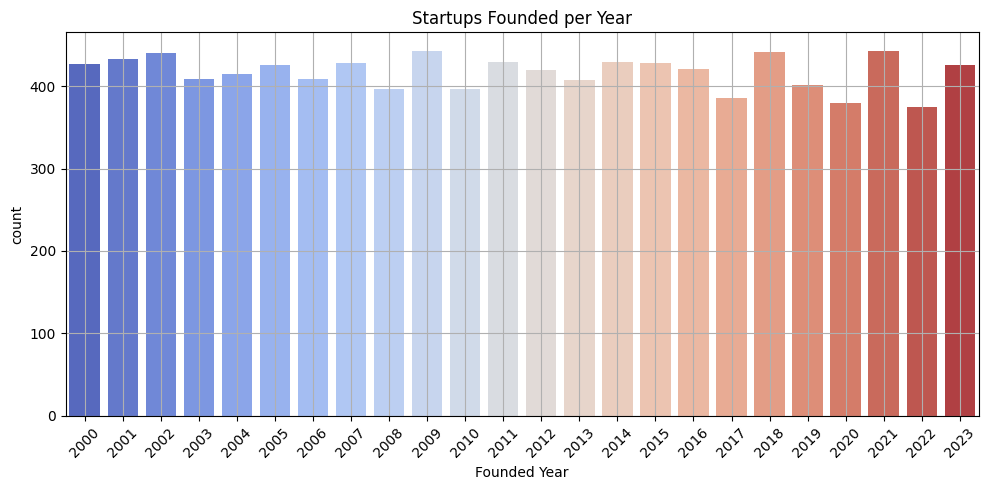

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Founded Year', data=df, order=sorted(df['Founded Year'].unique()), palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Startups Founded per Year')
plt.grid(True)
plt.tight_layout()
plt.show()


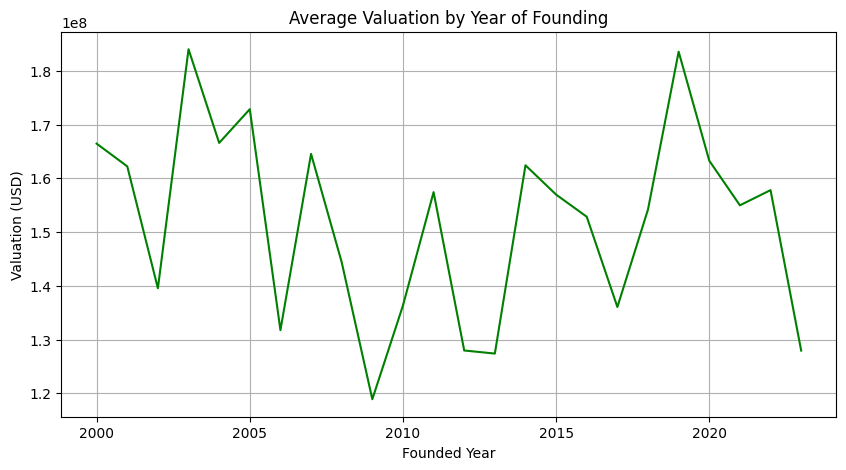

In [19]:
yearly_val = df.groupby('Founded Year')['Valuation (USD)'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_val, x='Founded Year', y='Valuation (USD)', color='green')
plt.title('Average Valuation by Year of Founding')
plt.grid(True)
plt.show()


In [20]:
industry_bubble = df.groupby('Industry')[['Valuation (USD)', 'Revenue (USD)']].mean().reset_index()
industry_bubble['Employees'] = df.groupby('Industry')['Number of Employees'].mean().values

fig = px.scatter(industry_bubble,
                 x='Revenue (USD)',
                 y='Valuation (USD)',
                 size='Employees',
                 color='Industry',
                 title='Industry: Revenue vs Valuation vs Employees',
                 hover_name='Industry',
                 size_max=60)
fig.show()


C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\775688052.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  industry_bubble = df.groupby('Industry')[['Valuation (USD)', 'Revenue (USD)']].mean().reset_index()
C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\775688052.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  industry_bubble['Employees'] = df.groupby('Industry')['Number of Employees'].mean().values


In [21]:
country_bubble = df.groupby('Country')[['Valuation (USD)', 'Revenue (USD)']].mean().reset_index()
country_bubble['Employees'] = df.groupby('Country')['Number of Employees'].mean().values

fig = px.scatter(
    country_bubble,
    x='Revenue (USD)',
    y='Valuation (USD)',
    size='Employees',
    color='Country',
    title='Country: Revenue vs Valuation vs Employees',
    hover_name='Country',
    size_max=60
)
fig.show()


C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\4060174750.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\mansi\AppData\Local\Temp\ipykernel_4192\4060174750.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [22]:
year_bubble = df.groupby('Founded Year')[['Valuation (USD)', 'Revenue (USD)']].mean().reset_index()
year_bubble['Employees'] = df.groupby('Founded Year')['Number of Employees'].mean().values

fig = px.scatter(
    year_bubble,
    x='Revenue (USD)',
    y='Valuation (USD)',
    size='Employees',
    color='Founded Year',
    title='Year Founded: Revenue vs Valuation vs Employees',
    hover_name='Founded Year',
    size_max=60
)
fig.show()


In [23]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. Prepare the Data
df_model = df.copy()

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Country', 'City', 'Industry', 'Funding Stage']

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Drop columns that may not be useful
drop_cols = ['Startup Name', 'Website', 'Description']
for col in drop_cols:
    if col in df_model.columns:
        df_model.drop(col, axis=1, inplace=True)

# Define features (X) and target (y)
X = df_model.drop(['Success', 'Failure'], axis=1)
y = df_model['Success']  # Target: 1 = Success, 0 = Failure

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Model
model = LinearRegression(random_state=42)
model.fit(X_train, y_train)

# 4. Predictions
y_pred = model.predict(X_test)

# 5. Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


TypeError: LinearRegression.__init__() got an unexpected keyword argument 'random_state'

C:\Users\anugrah\AppData\Local\Temp\ipykernel_7404\1675355012.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




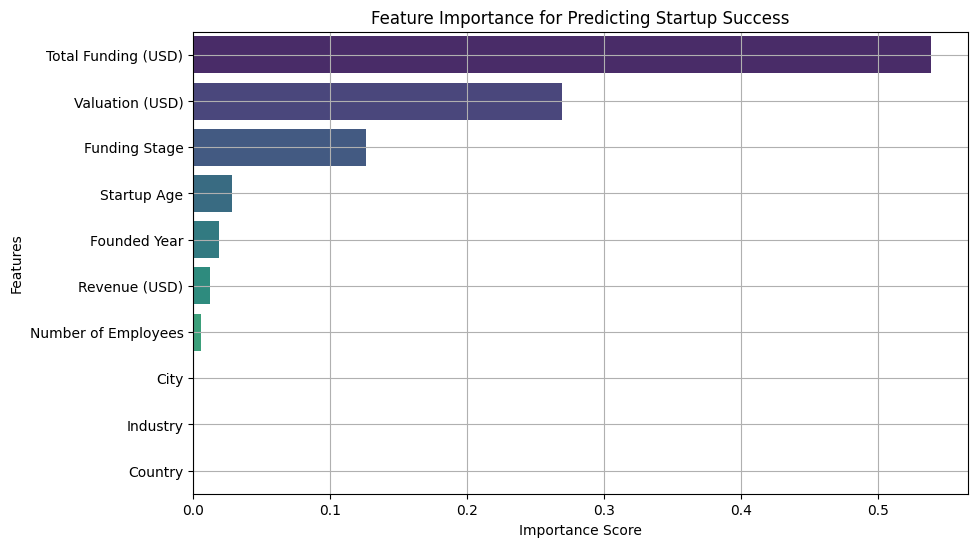

In [ ]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance for Predicting Startup Success')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()


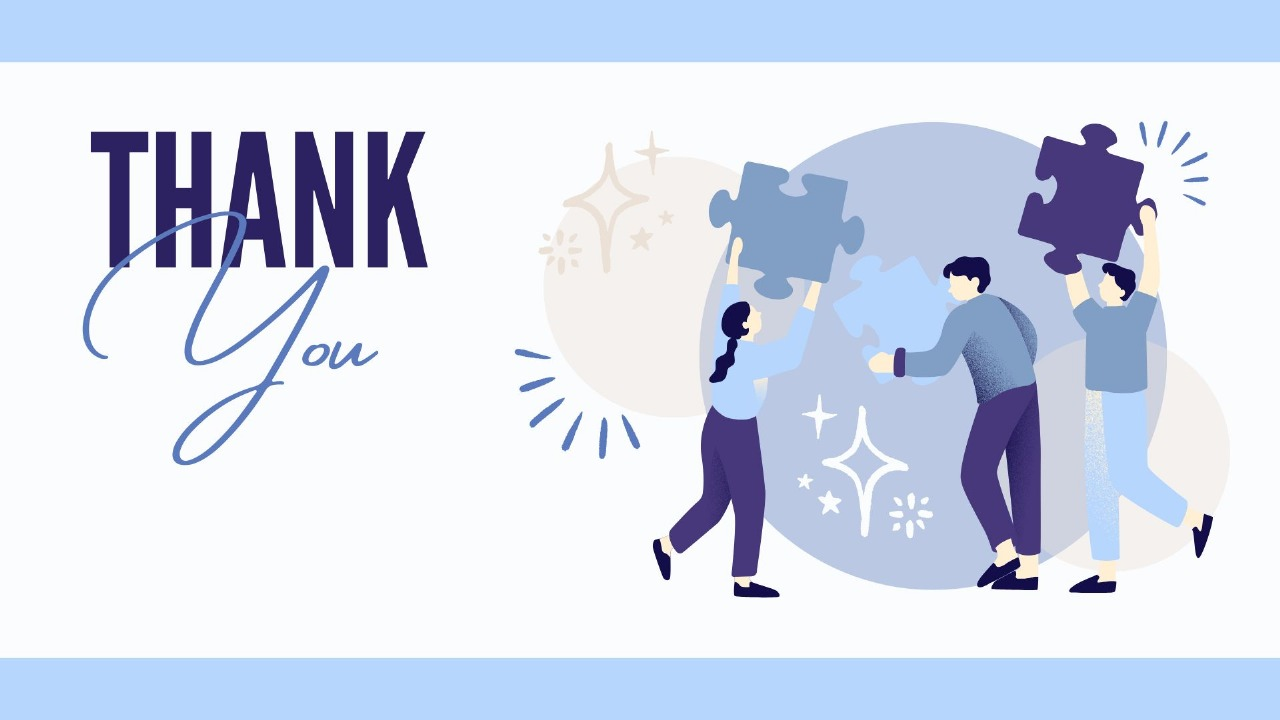

In [ ]:
from PIL import Image
from IPython.display import display
img = Image.open('Startup Analysis2.jpg')
display(img)